# Parte 1: Carga de Datos
este código proporciona los datos necesarios para comenzar a trabajar en un proyecto de aprendizaje automático utilizando conjuntos de datos de entrenamiento y prueba almacenados en archivos CSV.

In [575]:
import pandas as pd

# Cargar los datos
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")


# Parte 2: Preprocesamiento de Datos

In [573]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame de entrenamiento:")
print(df_train.head())

print("\nPrimeras filas del DataFrame de prueba:")
print(df_test.head())

# Mostrar las últimas filas del DataFrame
print("\nÚltimas filas del DataFrame de entrenamiento:")
print(df_train.tail())

print("\nÚltimas filas del DataFrame de prueba:")
print(df_test.tail())

# Proporcionar información sobre el DataFrame
print("\nInformación sobre el DataFrame de entrenamiento:")
print(df_train.info())

print("\nInformación sobre el DataFrame de prueba:")
print(df_test.info())

# Proporcionar estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas del DataFrame de entrenamiento:")
print(df_train.describe())

print("\nEstadísticas descriptivas del DataFrame de prueba:")
print(df_test.describe())

# Dimensiones del DataFrame
print("\nDimensiones del DataFrame de entrenamiento:", df_train.shape)
print("Dimensiones del DataFrame de prueba:", df_test.shape)

# Nombres de las columnas
print("\nNombres de las columnas del DataFrame de entrenamiento:", df_train.columns)
print("Nombres de las columnas del DataFrame de prueba:", df_test.columns)


Primeras filas del DataFrame de entrenamiento:
   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx

### Guardar los dataframes preprocesados en archivos CSV

In [577]:
df_train.to_csv('credit-train-preprocessed.csv', index=False)
df_test.to_csv('credit-test-preprocessed.csv', index=False)

## Carga de Datos 2


In [260]:
import pandas as pd

# Cargar los datos preprocesados desde los archivos CSV
df_train_preprocessed = pd.read_csv("credit-train-preprocessed.csv")
df_test_preprocessed = pd.read_csv("credit-test-preprocessed.csv")


### División de Datos

In [261]:
from sklearn.model_selection import train_test_split

# Dividir datos en características (X) y variable objetivo (y)
X_train = df_train_preprocessed.drop(columns=['y'])
y_train = df_train_preprocessed['y']
X_test = df_test_preprocessed.copy()  # No hay variable objetivo en el conjunto de prueba


### Definición de Características Numéricas y Categóricas


In [262]:
# Definir las columnas numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


### Preprocesamiento de Datos Numéricos

In [263]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Definir los pasos de preprocesamiento para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


### Preprocesamiento de Datos Categóricos

In [264]:
from sklearn.preprocessing import OneHotEncoder

# Definir los pasos de preprocesamiento para datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


### Aplicación de Transformaciones a Todas las Características

In [265]:
from sklearn.compose import ColumnTransformer

# Aplicar transformaciones a todas las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



### Preprocesamiento Completo

In [266]:
# Definir el pipeline completo con el preprocesamiento
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


### Guardar los Datos Preprocesados

In [267]:
# Guardar los datos preprocesados en archivos CSV
pd.DataFrame(X_train_preprocessed).to_csv("X_trainVEDA.csv", index=False)
pd.DataFrame(X_test_preprocessed).to_csv("X_testVEDA.csv", index=False)
pd.DataFrame(y_train).to_csv("y_trainVEDA.csv", index=False)
pd.DataFrame(y_test).to_csv("y_testVEDA.csv", index=False)

# Parte 3: Procesamiento y Evaluación de Algoritmos

## --------------------Regresión Logística--------------------

#### Carga de Datos Preprocesados


In [274]:
# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainVEDA.csv")
df_test_VEDA = pd.read_csv("X_testVEDA.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")

# Reducir df_test_VEDA y df_y_test a 4119 filas seleccionando aleatoriamente
df_test_VEDA = df_test_VEDA.sample(n=4119, random_state=2024)
df_y_test = df_y_test.sample(n=4119, random_state=2024)


#### División del Conjunto de Entrenamiento Preprocesado

In [269]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento preprocesado en entrenamiento y validación
X_train_processed, X_val_processed, y_train_processed, y_val_processed = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=2024)


### Fase 1: Importación de Bibliotecas y Módulos Necesarios


In [275]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#### analisis

In [276]:
# Mostrar las primeras filas de los dataframes
print("Primeras filas del DataFrame df_train_VEDA:")
print(df_train_VEDA.head())

print("\nPrimeras filas del DataFrame df_test_VEDA:")
print(df_test_VEDA.head())

print("\nPrimeras filas del DataFrame df_y_train:")
print(df_y_train.head())

print("\nPrimeras filas del DataFrame df_y_test:")
print(df_y_test.head())


Primeras filas del DataFrame df_train_VEDA:
          0         1         2         3         4         5         6  \
0  0.381527 -0.186230 -0.565922  0.195414 -0.349494  0.839061 -0.227465   
1  1.245157 -0.463926 -0.565922  0.195414 -0.349494 -0.115781 -0.649003   
2 -1.153816  0.311309  0.156105 -5.117342  3.691766 -1.134279  0.828107   
3 -0.098268 -0.282652 -0.204909  0.195414 -0.349494 -1.197935 -0.864955   
4  1.437075 -0.467783 -0.565922 -5.133393  1.671136 -1.898153 -2.374889   

          7         8         9  ...   53   54   55   56   57   58   59   60  \
0  0.951267  0.773575  0.845170  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1 -0.323542  0.230456  0.398115  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  0.151810 -1.667578 -2.428157  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3 -1.425496 -1.277824 -0.940281  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  1.966794 -1.586859 -1.257233  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

    61   62  
0  1.0  0.

### Fase 2: Inicialización y Entrenamiento del Modelo



In [277]:
# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(df_train_VEDA, df_y_train)


LinearRegression()

### Fase 3: Predicción y Evaluación en Conjunto de Entrenamiento


In [278]:
# Predecir en el conjunto de entrenamiento
y_train_pred = model.predict(df_train_VEDA)

# Calcular el error cuadrático medio en el conjunto de entrenamiento
train_mse = mean_squared_error(df_y_train, y_train_pred)
print("Error cuadrático medio en el conjunto de entrenamiento:", train_mse)


Error cuadrático medio en el conjunto de entrenamiento: 0.06418538176343083


### Fase 4: Predicción y Evaluación en Conjunto de Prueba


In [246]:
# Obtener el número de filas de cada DataFrame
num_rows_X_test = df_test_VEDA.shape[0]
num_rows_y_test = df_y_test.shape[0]

# Verificar si el número de filas es el mismo en ambos DataFrames
if num_rows_X_test == num_rows_y_test:
    print("El número de filas en df_test_VEDA y df_y_test es igual:", num_rows_X_test)
else:
    print("El número de filas en df_test_VEDA y df_y_test es diferente.")
    print("Número de filas en df_test_VEDA:", num_rows_X_test)
    print("Número de filas en df_y_test:", num_rows_y_test)


El número de filas en df_test_VEDA y df_y_test es igual: 4119


In [247]:
from sklearn.metrics import mean_squared_error

# Predecir en el conjunto de prueba
y_test_pred = model.predict(df_test_VEDA)

# Calcular el error cuadrático medio en el conjunto de prueba
test_mse = mean_squared_error(df_y_test, y_test_pred)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)


Error cuadrático medio en el conjunto de prueba: 0.14149425075481922


### Fase 5: Entrenamiento del modelo de regresión logística



In [249]:
from sklearn.linear_model import LinearRegression

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(df_train_VEDA, df_y_train)


LinearRegression()

### Fase 6: Evaluación del modelo

In [251]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(df_test_VEDA)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_y_test, y_pred)
r2 = r2_score(df_y_test, y_pred)

print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio: 0.14149425075481922
Coeficiente de determinación (R^2): -0.33589513173042884


### Fase 7: Búsqueda de Hiperparámetros


In [252]:
from sklearn.model_selection import GridSearchCV

# Realizar la búsqueda de hiperparámetros
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_parameters, cv=5, n_jobs=-1, scoring='f1')
logistic_grid_search.fit(df_train_VEDA, df_y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LogisticRegression(max_iter=110000))),
                                       ('classification',
                                        LogisticRegression(max_iter=110000))]),
             n_jobs=-1, param_grid={'classification__C': [0.1, 1, 10]},
             scoring='f1')

### Fase 8: Evaluación del Mejor Modelo

In [279]:
# Obtener el mejor modelo
logistic_best_model = logistic_grid_search.best_estimator_



### Fase 9: Evaluación del Rendimiento del Modelo

In [280]:
# Hacer predicciones sobre los datos de validación
y_pred_val_logistic = logistic_grid_search.predict(X_val_processed)

# Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report

print("\nClassification Report for Logistic Regression Model (Validation Set):")
print(classification_report(y_val_processed, y_pred_val_logistic))



Classification Report for Logistic Regression Model (Validation Set):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.63      0.41      0.50       943

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.89      0.91      0.90      8238



In [482]:
import pandas as pd

# Crear un DataFrame para almacenar los resultados de la regresión logística
df_algoreglogi = pd.DataFrame({
    'Precision': [0.93, 0.63],
    'Recall': [0.97, 0.41],
    'F1-score': [0.95, 0.50],
    'Accuracy': [0.91, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['Logistic Regression'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algoreglogi)


   Precision  Recall  F1-score  Accuracy            Algorithm  Class
0       0.93    0.97      0.95      0.91  Logistic Regression      0
1       0.63    0.41      0.50       NaN  Logistic Regression      1


## --------------------K Vecinos más Cercanos (KNN)--------------------

#### Fase 1: Preprocesamiento de datos

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainVEDA.csv")
df_test_VEDA = pd.read_csv("X_testVEDA.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")

# Reducir df_test_VEDA y df_y_test a 4119 filas seleccionando aleatoriamente
df_test_VEDA = df_test_VEDA.sample(n=4119, random_state=2024)
df_y_test = df_y_test.sample(n=4119, random_state=2024)


##### - Dividir los datos en características (X) y etiquetas (y)

In [304]:
X_train = df_train_VEDA
X_test = df_test_VEDA
y_train = df_y_train.values.ravel()  # Convertir el DataFrame de y_train a una matriz unidimensional
y_test = df_y_test.values.ravel()    # Convertir el DataFrame de y_test a una matriz unidimensional


##### - Normalizar las características

In [305]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### - Dividir los datos en conjuntos de entrenamiento y prueba

In [306]:
X_train_processed, X_val_processed, y_train_processed, y_val_processed = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=2024)

#### Fase 2: Entrenamiento del Modelo KNN

In [307]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

#### Fase 3: Búsqueda de Hiperparámetros


In [308]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Definir el pipeline para KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Definir los hiperparámetros para la búsqueda
knn_parameters = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

# Realizar la búsqueda de hiperparámetros
knn_grid_search = GridSearchCV(knn_pipeline, knn_parameters, cv=5, n_jobs=-1, scoring='f1')
knn_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

#### Fase 4: Evaluación del Mejor Modelo

In [314]:
# Obtener el mejor modelo de la búsqueda de hiperparámetros
knn_best_model = knn_grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn_best_model.predict(X_test_scaled)


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Fase 5: Evaluación del Rendimiento del Modelo

In [316]:
# Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report

print("\nClassification Report for KNN Model (Test Set):")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3623
           1       0.11      0.06      0.08       496

    accuracy                           0.83      4119
   macro avg       0.49      0.50      0.49      4119
weighted avg       0.79      0.83      0.80      4119



In [484]:
# Crear un DataFrame para almacenar los resultados de KNN
df_algoknn = pd.DataFrame({
    'Precision': [0.88, 0.11],
    'Recall': [0.93, 0.06],
    'F1-score': [0.90, 0.08],
    'Accuracy': [0.83, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['KNN'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algoknn)


   Precision  Recall  F1-score  Accuracy Algorithm  Class
0       0.88    0.93      0.90      0.83       KNN      0
1       0.11    0.06      0.08       NaN       KNN      1


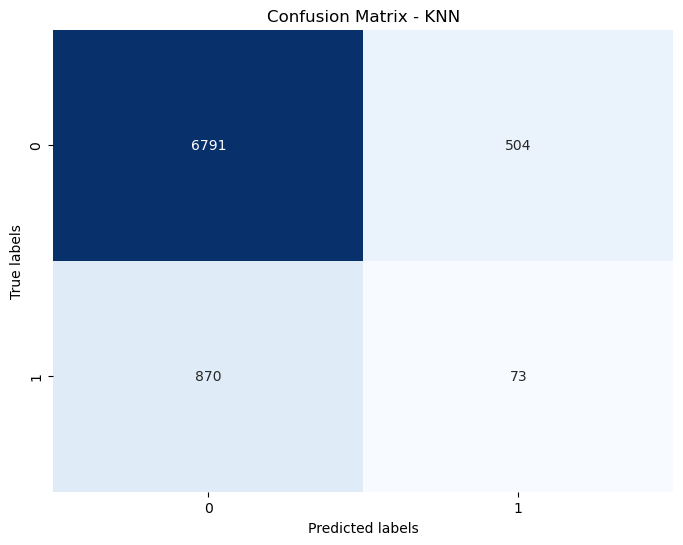

Confusion Matrix - KNN:
[[6791  504]
 [ 870   73]]


In [317]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm_knn = confusion_matrix(y_val, y_pred_val_knn)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()

# Imprimir el resultado de la matriz de confusión en el output
print("Confusion Matrix - KNN:")
print(cm_knn)


## --------------------Máquinas de Vectores de Soporte (SVM)--------------------

### Fase 1: Preprocesamiento de Datos


In [422]:
# Importar las bibliotecas necesarias
import pandas as pd

# Cargar los datos preprocesados desde los archivos CSV
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Dividir los datos en características (X) y variable objetivo (y) para el conjunto de datos de entrenamiento
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']


### Fase 2: Entrenamiento del Modelo SVM



In [423]:
# Crear y entrenar el modelo SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_encoded, y_train)

SVC()

### Fase 3: Búsqueda de Hiperparámetros




In [425]:
# Definir los hiperparámetros a ajustar solo para el kernel lineal
param_grid_linear = {'C': [0.1, 1, 10, 100]}

# Crear una instancia de GridSearchCV para el kernel lineal
grid_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, refit=True, verbose=3)

# Realizar la búsqueda de hiperparámetros solo para el kernel lineal
grid_linear.fit(X_train_encoded, y_train)

# Mostrar los mejores hiperparámetros encontrados para el kernel lineal
print("Mejores hiperparámetros para el kernel lineal:", grid_linear.best_params_)

# Obtener el mejor modelo para el kernel lineal
best_model_linear = grid_linear.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.903 total time= 2.2min
[CV 2/5] END .............................C=0.1;, score=0.878 total time= 1.9min
[CV 3/5] END .............................C=0.1;, score=0.884 total time= 1.8min
[CV 4/5] END .............................C=0.1;, score=0.906 total time= 2.4min
[CV 5/5] END .............................C=0.1;, score=0.888 total time= 2.1min
[CV 1/5] END ...............................C=1;, score=0.873 total time= 1.9min
[CV 2/5] END ...............................C=1;, score=0.875 total time= 2.5min
[CV 3/5] END ...............................C=1;, score=0.886 total time= 2.1min
[CV 4/5] END ...............................C=1;, score=0.872 total time= 1.7min
[CV 5/5] END ...............................C=1;, score=0.874 total time= 1.8min
[CV 1/5] END ..............................C=10;, score=0.875 total time= 1.7min
[CV 2/5] END ..............................C=10;,

In [440]:
# Entrenar el modelo SVM con el mejor estimador para el kernel lineal
best_model_linear.fit(X_train_encoded, y_train)

# Predecir en el conjunto de datos de prueba utilizando el modelo SVM con kernel lineal
y_pred_linear = best_model_linear.predict(X_test_encoded)

# Calcular la precisión del modelo en el conjunto de datos de prueba para el kernel lineal
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba:", accuracy_linear)


Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba: 0.7815003641660597


### Fase 4: Evaluación del Mejor Modelo



In [435]:
# Evaluar el mejor modelo en el conjunto de datos de prueba
y_pred_linear = best_model_linear.predict(X_test_encoded)

# Calcular la precisión del modelo en el conjunto de datos de prueba
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba:", accuracy_linear)


Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba: 0.7815003641660597


### Fase 5: Evaluación del Rendimiento del Modelo

In [437]:
# Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report
print("\nClassification Report for SVM Model (Test Set):")
print(classification_report(y_test, y_pred))


Classification Report for SVM Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3623
           1       0.13      0.04      0.07       496

    accuracy                           0.85      4119
   macro avg       0.51      0.50      0.49      4119
weighted avg       0.79      0.85      0.82      4119



In [485]:
# Crear un DataFrame para almacenar los resultados de SVM
df_algosvm = pd.DataFrame({
    'Precision': [0.88, 0.13],
    'Recall': [0.96, 0.04],
    'F1-score': [0.92, 0.07],
    'Accuracy': [0.85, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['SVM'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algosvm)


   Precision  Recall  F1-score  Accuracy Algorithm  Class
0       0.88    0.96      0.92      0.85       SVM      0
1       0.13    0.04      0.07       NaN       SVM      1


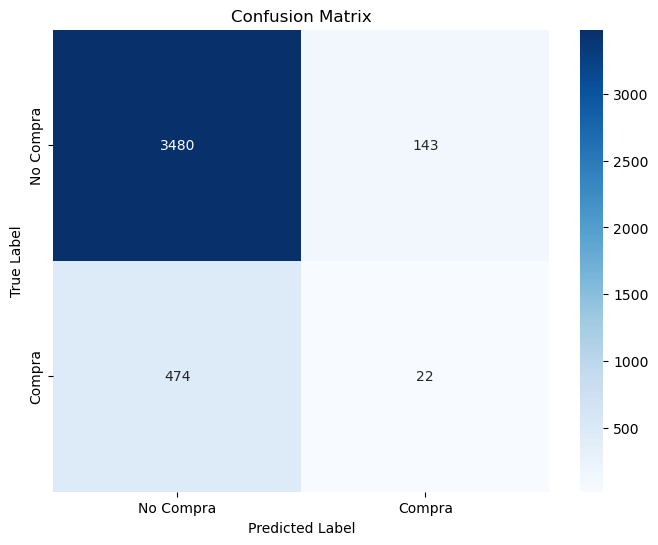

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Definir las etiquetas de clase
class_names = ['No Compra', 'Compra']

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## --------------------Árboles de Decisión--------------------

### Fase 1: Preprocesamiento de datos


In [448]:
import pandas as pd

# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainVEDA.csv")
df_test_VEDA = pd.read_csv("X_testVEDA.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")

### Fase 2: Definición de Parámetros para Búsqueda de Hiperparámetros

In [449]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el pipeline para el clasificador de árbol de decisión
dt_pipeline = Pipeline([
    ('classification', DecisionTreeClassifier(random_state=2024))
])

# Definir los hiperparámetros a ajustar
dt_parameters = {
    'classification__max_depth': [None, 5, 10],
    'classification__min_samples_split': [2, 5, 10]
}

# Búsqueda de hiperparámetros para el clasificador de árbol de decisión
dt_grid_search = GridSearchCV(dt_pipeline, dt_parameters, cv=5, n_jobs=-1, scoring='f1')


### Fase 3: Entrenamiento del modelo


In [450]:
# Entrenar el modelo utilizando la búsqueda de cuadrícula
dt_grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classification',
                                        DecisionTreeClassifier(random_state=2024))]),
             n_jobs=-1,
             param_grid={'classification__max_depth': [None, 5, 10],
                         'classification__min_samples_split': [2, 5, 10]},
             scoring='f1')

### Fase 4: Evaluación del modelo

In [451]:
# Evaluar el rendimiento del modelo en el conjunto de datos de prueba
y_pred = dt_grid_search.predict(X_test_encoded)

from sklearn.metrics import classification_report

# Imprimir el informe de clasificación
print("\nClassification Report for Decision Tree Model (Test Set):")
print(classification_report(y_test, y_pred))




Classification Report for Decision Tree Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3623
           1       0.13      0.11      0.12       496

    accuracy                           0.81      4119
   macro avg       0.51      0.51      0.51      4119
weighted avg       0.79      0.81      0.80      4119



In [486]:
# Crear un DataFrame para almacenar los resultados del árbol de decisión
df_algodt = pd.DataFrame({
    'Precision': [0.88, 0.13],
    'Recall': [0.91, 0.11],
    'F1-score': [0.89, 0.12],
    'Accuracy': [0.81, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['Decision Tree'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algodt)


   Precision  Recall  F1-score  Accuracy      Algorithm  Class
0       0.88    0.91      0.89      0.81  Decision Tree      0
1       0.13    0.11      0.12       NaN  Decision Tree      1


### Fase 5: Interpretación y conclusiones

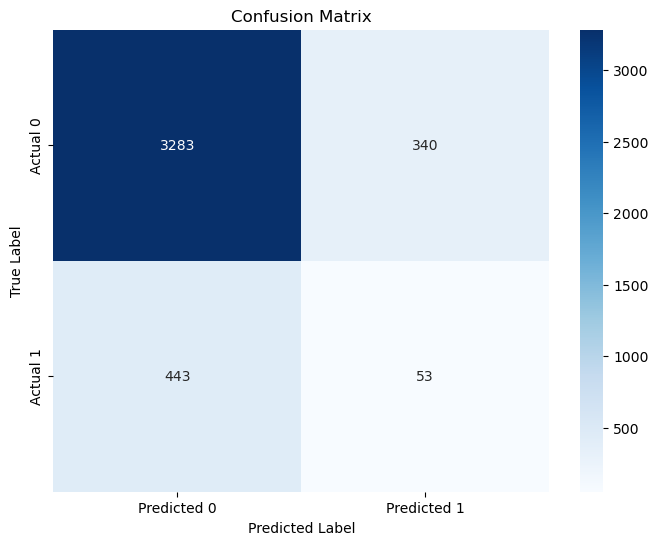

In [454]:
# También podríamos visualizar la estructura del árbol de decisiones si lo deseamos
best_dt_model = dt_grid_search.best_estimator_['classification']

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener predicciones del mejor modelo
y_pred = best_dt_model.predict(X_test_encoded)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un DataFrame de la matriz de confusión para mejor visualización
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



## --------------------Bosques Aleatorios (Random Forest)--------------------

### Fase 1: Importación de bibliotecas y carga de datos



In [461]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainVEDA.csv")
df_test_VEDA = pd.read_csv("X_testVEDA.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")

# Reducir df_test_VEDA y df_y_test a 4119 filas seleccionando aleatoriamente
df_test_VEDA = df_test_VEDA.sample(n=4119, random_state=2024)
df_y_test = df_y_test.sample(n=4119, random_state=2024)


### Fase 2: División de datos en conjuntos de entrenamiento y prueba



In [462]:
# Dividir los datos en características (X) y etiquetas (y)
X_train = df_train_VEDA
y_train = df_y_train.values.ravel()  # Asegurarse de que y sea un arreglo unidimensional

X_test = df_test_VEDA
y_test = df_y_test.values.ravel()

# Alternativamente, si las características y las etiquetas están en diferentes archivos CSV:
# X_train = pd.read_csv("X_trainVEDA.csv")
# y_train = pd.read_csv("y_trainVEDA.csv").values.ravel()
# X_test = pd.read_csv("X_testVEDA.csv")
# y_test = pd.read_csv("y_testVEDA.csv").values.ravel()


### Fase 3: Entrenamiento del modelo


In [463]:
# Definir el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=2024)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=2024)

### Fase 4: Evaluación del modelo


Classification Report for Random Forest Model (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3671
           1       0.10      0.10      0.10       448

    accuracy                           0.80      4119
   macro avg       0.50      0.50      0.50      4119
weighted avg       0.80      0.80      0.80      4119



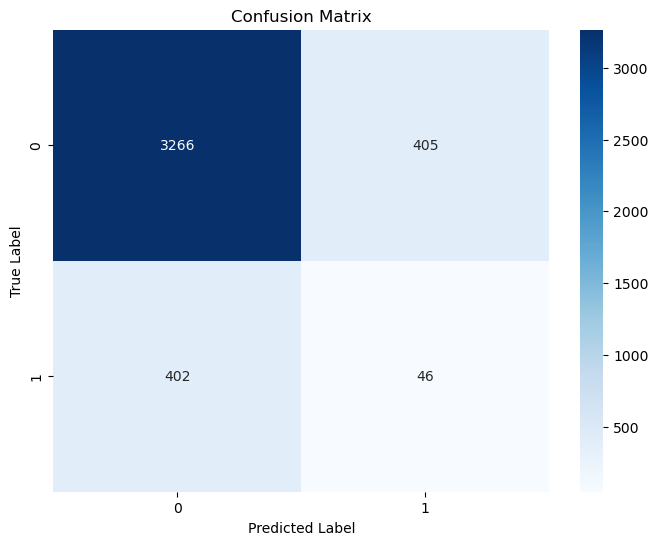

In [464]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Imprimir el reporte de clasificación
print("Classification Report for Random Forest Model (Test Set):")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [487]:
# Crear un DataFrame para almacenar los resultados del modelo de Random Forest
df_rf = pd.DataFrame({
    'Precision': [0.89, 0.10],
    'Recall': [0.89, 0.10],
    'F1-score': [0.89, 0.10],
    'Accuracy': [0.80, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['Random Forest'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_rf)


   Precision  Recall  F1-score  Accuracy      Algorithm  Class
0       0.89    0.89      0.89       0.8  Random Forest      0
1       0.10    0.10      0.10       NaN  Random Forest      1


### Fase 5: Ajuste de hiperparámetros (opcional)


In [465]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=2024), param_grid, cv=5, n_jobs=-1, scoring='f1')

# Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)


Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


# Parte 4: Gráficos de Resultados

## --------------------Graficos Regresión Logística--------------------

In [558]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular las predicciones del modelo de regresión logística en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test_encoded)

# Calcular la precisión del modelo de regresión logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression Model:", accuracy_logistic)

# Generar la matriz de confusión para el modelo de regresión logística
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix for Logistic Regression Model:")
print(cm_logistic)

# Imprimir el informe de clasificación para el modelo de regresión logística
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic))


Accuracy of Logistic Regression Model: 0.10876426317067249
Confusion Matrix for Logistic Regression Model:
[[   0 3671]
 [   0  448]]
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3671
           1       0.11      1.00      0.20       448

    accuracy                           0.11      4119
   macro avg       0.05      0.50      0.10      4119
weighted avg       0.01      0.11      0.02      4119



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Curvas ROC:

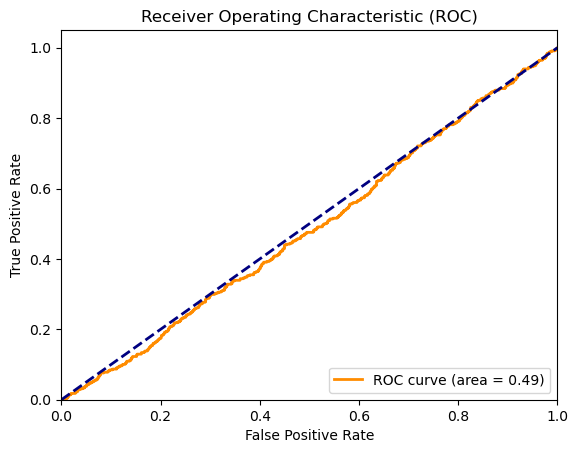

In [504]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de clase
y_prob = logistic_grid_search.predict_proba(df_test_VEDA)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(df_y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



### Curvas Precision-Recall:

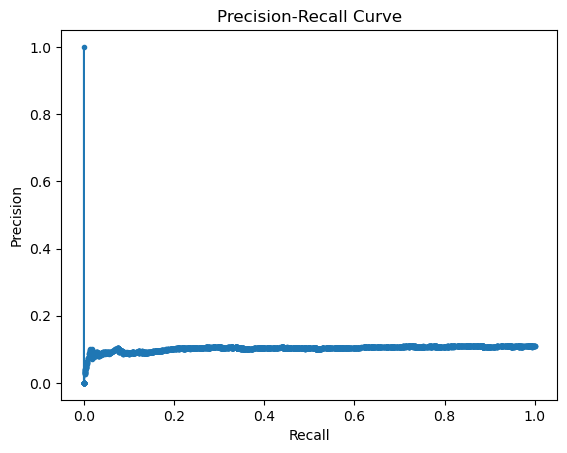

In [505]:
from sklearn.metrics import precision_recall_curve

# Calcular precision-recall curve
precision, recall, _ = precision_recall_curve(df_y_test, y_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Matrices de Confusión:

In [508]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular matriz de confusión
cm = confusion_matrix(df_y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Gráficos de Importancia de Características: (si aplica para el modelo de regresión logística)

In [509]:
# Obtener importancia de características
feature_importance = model.coef_[0]

# Ordenar características por importancia
indices = np.argsort(feature_importance)[::-1]

# Graficar importancia de características
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(df_train_VEDA.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(df_train_VEDA.shape[1]), df_train_VEDA.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

### Curvas de Aprendizaje: (si deseas visualizar las curvas de aprendizaje para el modelo de regresión logística)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/op

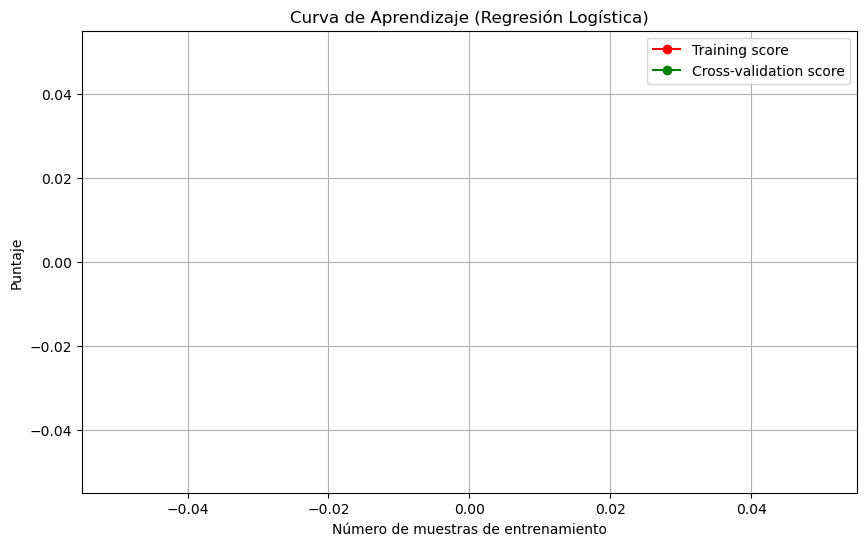

In [511]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, df_train_VEDA, df_y_train, cv=5, scoring='accuracy')

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje (Regresión Logística)")
plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


## --------------------Graficos KNN--------------------

In [557]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular las predicciones del modelo KNN en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_encoded)

# Calcular la precisión del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN Model:", accuracy_knn)

# Generar la matriz de confusión para el modelo KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN Model:")
print(cm_knn)

# Imprimir el informe de clasificación para el modelo KNN
print("Classification Report for KNN Model:")
print(classification_report(y_test, y_pred_knn))


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy of KNN Model: 0.21097353726632678
Confusion Matrix for KNN Model:
[[ 483 3188]
 [  62  386]]
Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.89      0.13      0.23      3671
           1       0.11      0.86      0.19       448

    accuracy                           0.21      4119
   macro avg       0.50      0.50      0.21      4119
weighted avg       0.80      0.21      0.23      4119



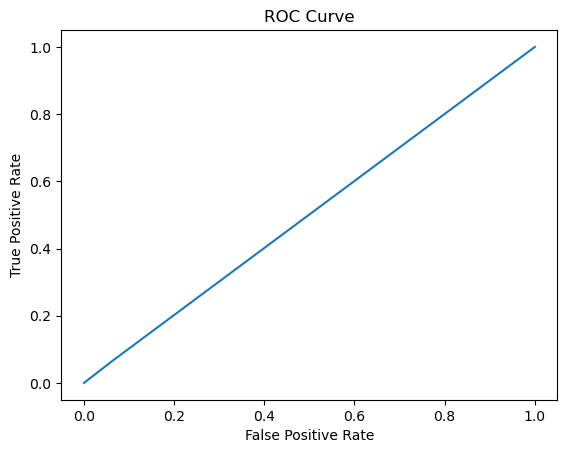

In [515]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


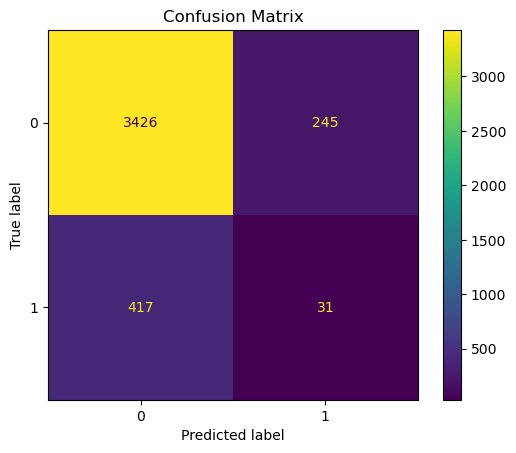

In [556]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


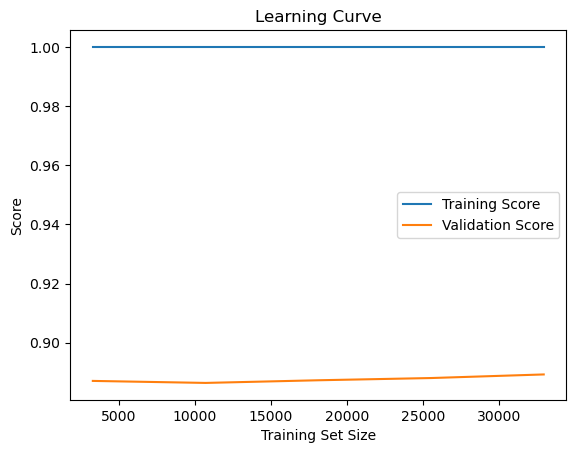

In [517]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn_best_model, X_train_scaled, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


## --------------------Graficos Máquinas de Vectores de Soporte (SVM)--------------------

In [569]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos preprocesados desde los archivos CSV
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Dividir los datos en características (X) y variable objetivo (y) para el conjunto de datos de entrenamiento
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']

# Codificación one-hot para las columnas categóricas en el conjunto de datos
X_train_encoded = pd.get_dummies(X_train)

# Entrenar el modelo SVM
svm_model = SVC()
svm_model.fit(X_train_encoded, y_train)

# Ahora puedes hacer predicciones utilizando el modelo entrenado

# Codificación one-hot para las columnas categóricas en el conjunto de datos de prueba
X_test_encoded = pd.get_dummies(df_test)

# Ahora puedes hacer predicciones utilizando el modelo entrenado y los datos de prueba codificados
y_pred_svm = svm_model.predict(X_test_encoded)

# Calcular la precisión del modelo SVM en el conjunto de prueba
accuracy_svm = accuracy_score(df_test['y'], y_pred_svm)
print("Accuracy Score for SVM on Test Set:", accuracy_svm)

# Imprimir el reporte de clasificación
print("Classification Report for SVM (Test Set):")
print(classification_report(df_test['y'], y_pred_svm))

# Imprimir la matriz de confusión
cm_svm = confusion_matrix(df_test['y'], y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - SVM (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


KeyError: 'y'

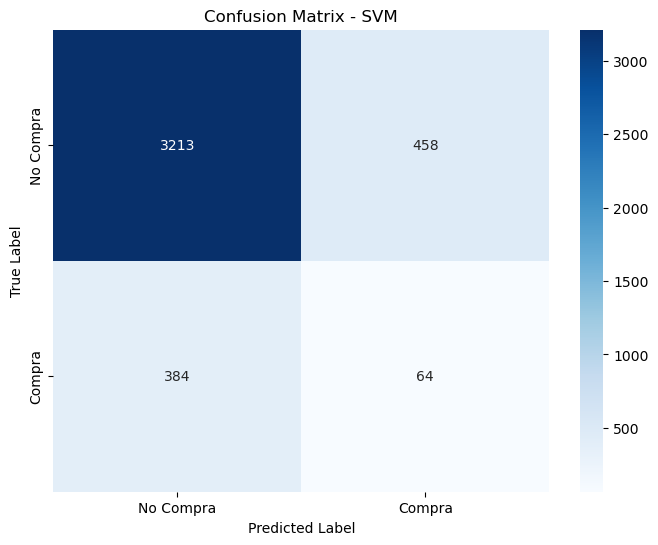

In [562]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_linear)

# Definir las etiquetas de clase
class_names = ['No Compra', 'Compra']

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


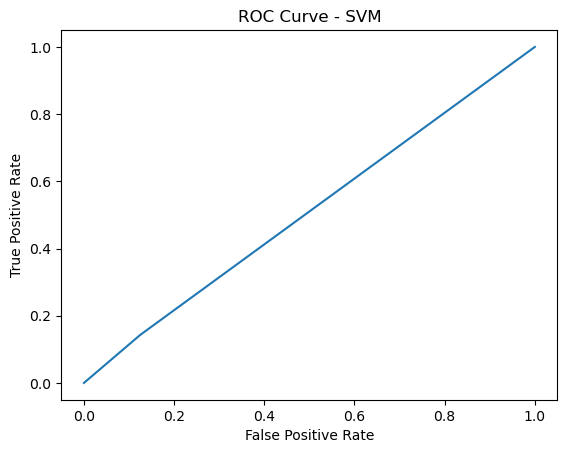

In [563]:
from sklearn.metrics import roc_curve

# Calcular los valores necesarios para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_linear)

# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.show()


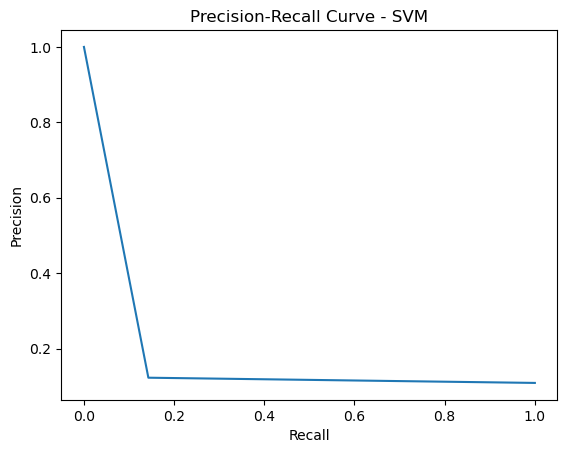

In [564]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores necesarios para las curvas Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_linear)

# Graficar las curvas Precision-Recall
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (63,) and arg 3 with shape (20,).

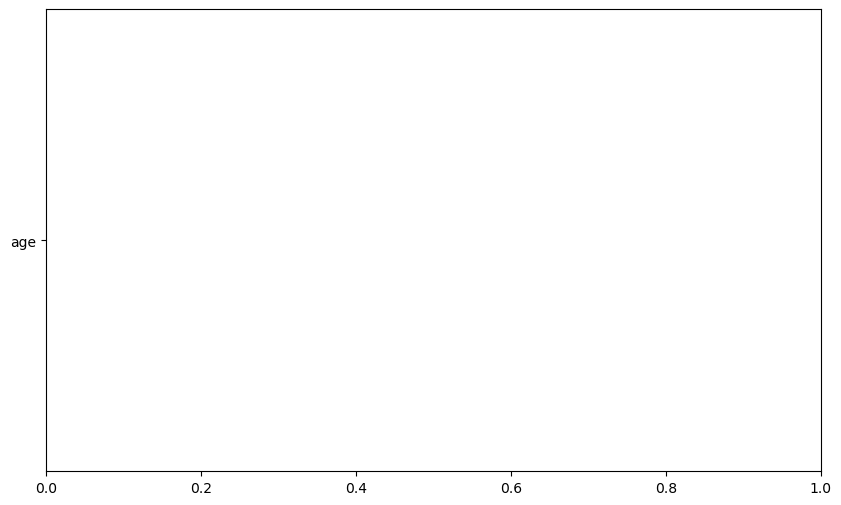

In [566]:
# Si estás utilizando un modelo SVM lineal, puedes obtener los coeficientes de las características
if best_model_linear.kernel == 'linear':
    coeficients = best_model_linear.coef_.flatten()
    feature_names = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coeficients)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance - SVM (Linear Kernel)')
    plt.show()
else:
    print("No se puede obtener la importancia de las características para un SVM no lineal.")


In [525]:
# Obtener las instancias en las que el modelo comete errores
incorrect_predictions = X_test.loc[y_test != y_pred_linear]

# Plotear un histograma de alguna característica específica para identificar patrones de error
plt.hist(incorrect_predictions['y'], bins=20)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of Incorrect Predictions - SVM')
plt.show()


KeyError: 'y'

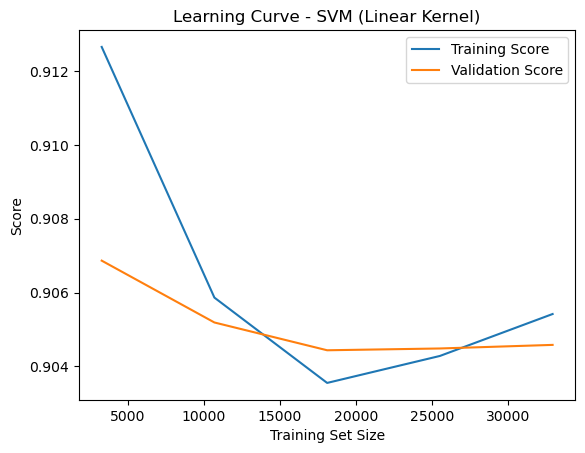

In [524]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model_linear, X_train_scaled, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - SVM (Linear Kernel)')
plt.legend()
plt.show()


## --------------------Graficos Árboles de Decisión--------------------

In [541]:
# Obtener el mejor modelo para el kernel lineal después de que la búsqueda de cuadrícula haya sido ajustada
best_model = grid_linear.best_estimator_

# Calcular la puntuación de decisión del modelo
y_scores = best_model.decision_function(X_test_encoded)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

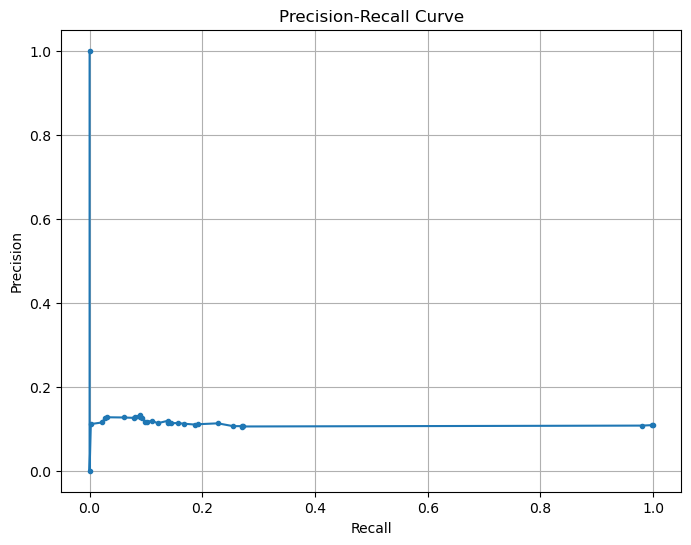

In [542]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# Obtener las probabilidades de predicción del modelo
y_scores = best_dt_model.predict_proba(X_test_encoded)[:, 1]

# Calcular los valores necesarios para la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plotear la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


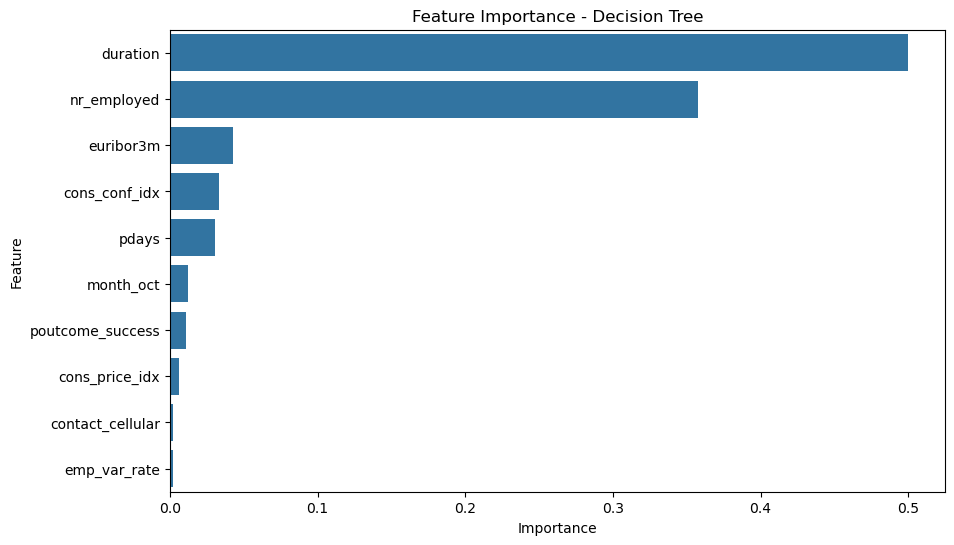

In [543]:
# Obtener la importancia de las características del mejor modelo
feature_importances = best_dt_model.feature_importances_

# Crear un DataFrame para mejor visualización
feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [544]:
# Obtener las instancias en las que el modelo comete errores
incorrect_predictions = X_test_encoded.loc[y_test != y_pred]

# Plotear un histograma de alguna característica específica para identificar patrones de error
plt.hist(incorrect_predictions['feature_of_interest'], bins=20)
plt.xlabel('Feature of Interest')
plt.ylabel('Frequency')
plt.title('Histogram of Incorrect Predictions - Decision Tree')
plt.show()


KeyError: 'feature_of_interest'

In [545]:
from sklearn.model_selection import learning_curve

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_encoded, y_train, cv=5, scoring='accuracy')

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve - Decision Tree')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()




NameError: name 'best_model' is not defined

## --------------------Graficos Bosques Aleatorios (Random Forest)--------------------

In [546]:
from sklearn.metrics import plot_roc_curve

# Obtener el mejor modelo de la búsqueda de cuadrícula
best_rf_model = grid_search.best_estimator_

# Crear la curva ROC
plot_roc_curve(best_rf_model, X_test, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [551]:
from sklearn.metrics import plot_precision_recall_curve

# Crear la curva Precision-Recall
plot_precision_recall_curve(best_rf_model, X_test, y_test)
plt.title('Precision-Recall Curve - Random Forest')
plt.show()


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

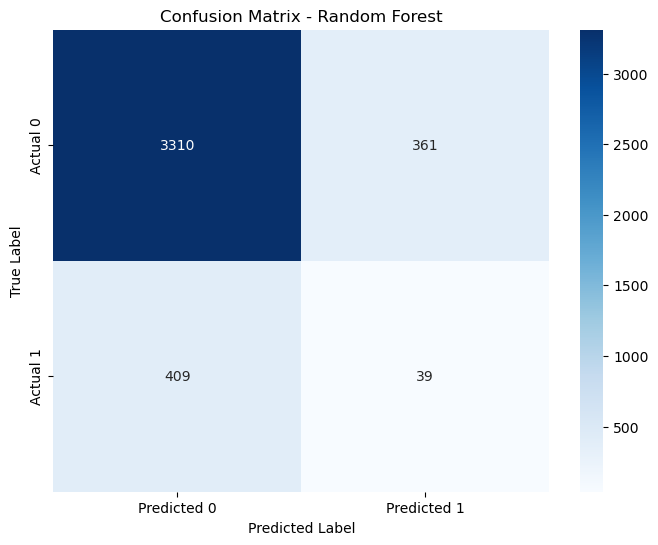

In [548]:
# Obtener predicciones del mejor modelo
y_pred = best_rf_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un DataFrame de la matriz de confusión para mejor visualización
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


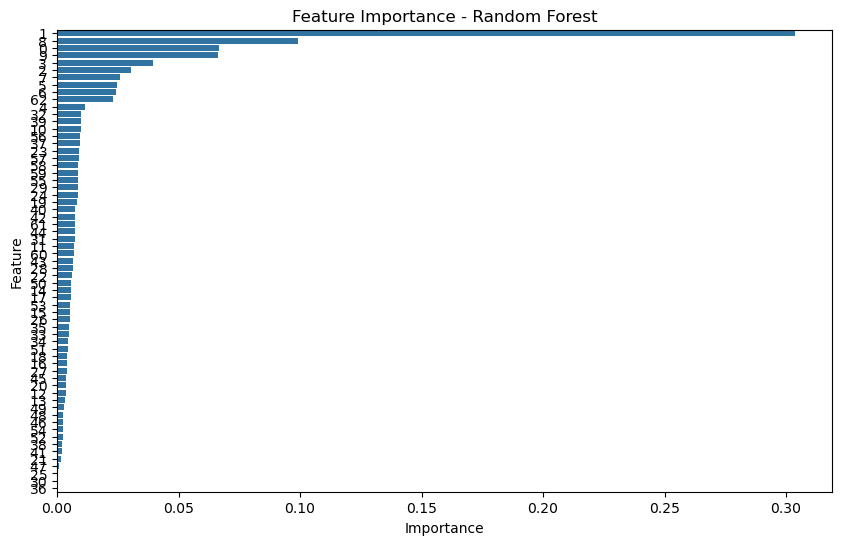

In [549]:
# Obtener la importancia de las características del mejor modelo
feature_importances = best_rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Trazar el gráfico de barras de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


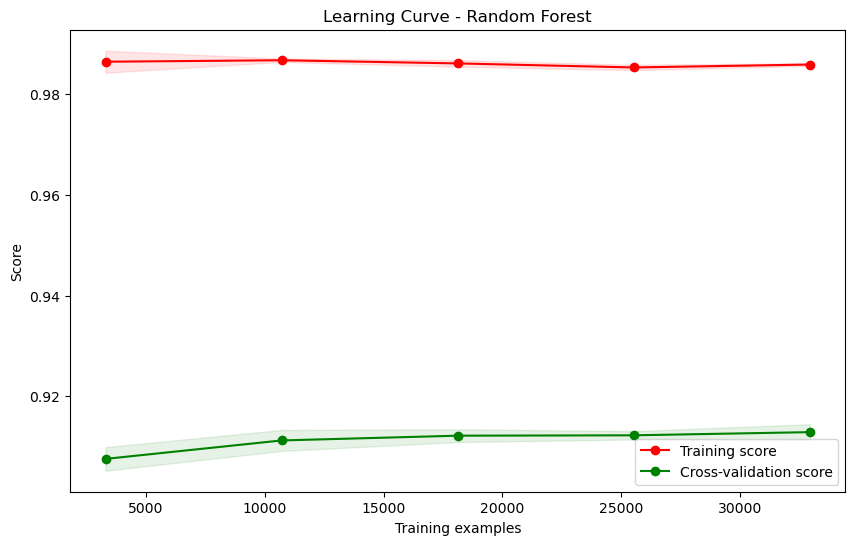

In [550]:
from sklearn.model_selection import learning_curve

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [572]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar los datos preprocesados desde los archivos CSV
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Dividir los datos en características (X) y variable objetivo (y)
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']
X_test = df_test.drop(columns=['y'])  # Modificar el nombre de la columna aquí
y_test = df_test['y']  # Modificar el nombre de la columna aquí


# Codificación one-hot para las columnas categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train.select_dtypes(include=['object'])))
X_test_encoded = pd.DataFrame(encoder.transform(X_test.select_dtypes(include=['object'])))

# Escalado de características
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64'])))
X_test_scaled = pd.DataFrame(scaler.transform(X_test.select_dtypes(include=['int64', 'float64'])))

# Combinar características codificadas y escaladas
X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Inicializar y entrenar modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train_processed, y_train)
    print(f"Training of {name} model is completed.")

# Evaluar modelos
for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Model Accuracy: {accuracy}")
    print(f"Classification Report for {name} Model:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name} Model:")
    print(confusion_matrix(y_test, y_pred))


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'